In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import preprocessing
from scipy.stats import shapiro, kstest

In [2]:
df = pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/boston_house_price.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df[['CRIM','INDUS']].sum()

CRIM     1828.44292
INDUS    5635.21000
dtype: float64

In [6]:
df[['CRIM','INDUS']].mean()

CRIM      3.613524
INDUS    11.136779
dtype: float64

In [7]:
df[['RAD','B']].mode()

,RAD,B
0,24.0,396.9


In [8]:
df[['CRIM','INDUS']].median()

CRIM     0.25651
INDUS    9.69000
dtype: float64

In [9]:
df[['CRIM','INDUS']].quantile([0.25, 0.5, 0.75])

,CRIM,INDUS
0.25,0.082045,5.19
0.50,0.256510,9.69
0.75,3.677083,18.10


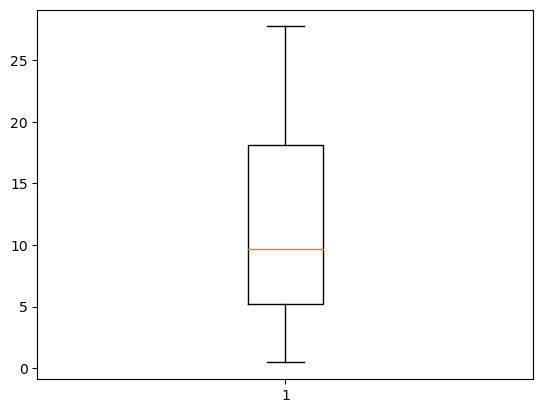

In [10]:
data = df.INDUS

# Create a box plot
plt.boxplot(data)

# Display the plot
plt.show()

In [11]:
df['CHAS'].value_counts()

CHAS
0.0    471
1.0     35
Name: count, dtype: int64

Text(0.5, 1.05, 'sex distribution')

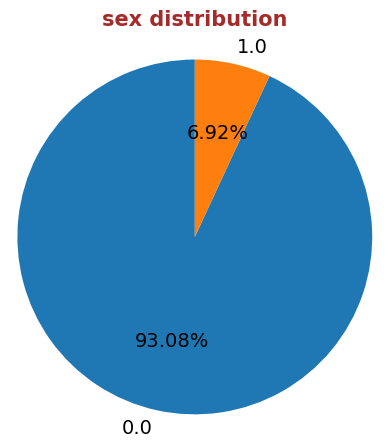

In [12]:
sorted_counts = df['CHAS'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%1.2f%%', 
                     counterclock = True, radius = 1.2, textprops={'fontsize': 14})
plt.title(f'sex distribution',fontsize=15, weight='bold', color='brown', loc='center', y=1.05)

In [13]:
df.std()

CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
MEDV         9.197104
dtype: float64

In [14]:
df['CRIM'].var()

73.98657819906929

In [15]:
df['CRIM'].kurt()

37.13050912952203

In [16]:
df['CRIM'].skew()

5.223148798243851

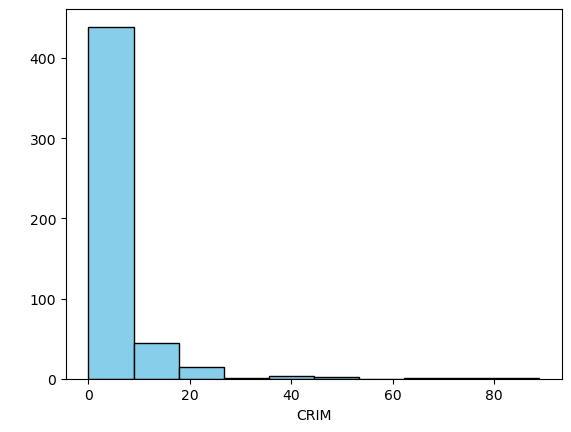

In [17]:
# Generate random data for the histogram
data = df['CRIM']
 
# Plotting a basic histogram
plt.hist(data, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('CRIM')
plt.ylabel(' ')
 
# Display the plot
plt.show()

C:\Users\Tanyathep\AppData\Local\Temp\ipykernel_6812\3619155555.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CRIM']);


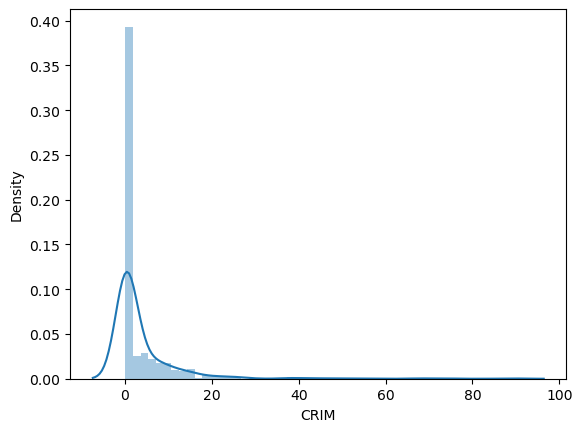

In [18]:
sns.distplot(df['CRIM']);

In [19]:
W, p = shapiro(df['CRIM'])
print("Shapiro-Wilk: W: {0} p = {1}".format(W,p))
# ถ้า p-value มากกว่า 0.05 แปลว่าไม่สามารถปฏิเสธได้ว่าไม่ใช่ normal distribution

Shapiro-Wilk: W: 0.44996488094329834 p = 1.3285678005931464e-36


In [20]:
D, p = shapiro(df['CRIM'])
print("Kolmogorov-Smirov: D: {0} p = {1}".format(D,p))
# ถ้า p-value มากกว่า 0.05 แปลว่าไม่สามารถปฏิเสธได้ว่าไม่ใช่ normal distribution

Kolmogorov-Smirov: D: 0.44996488094329834 p = 1.3285678005931464e-36


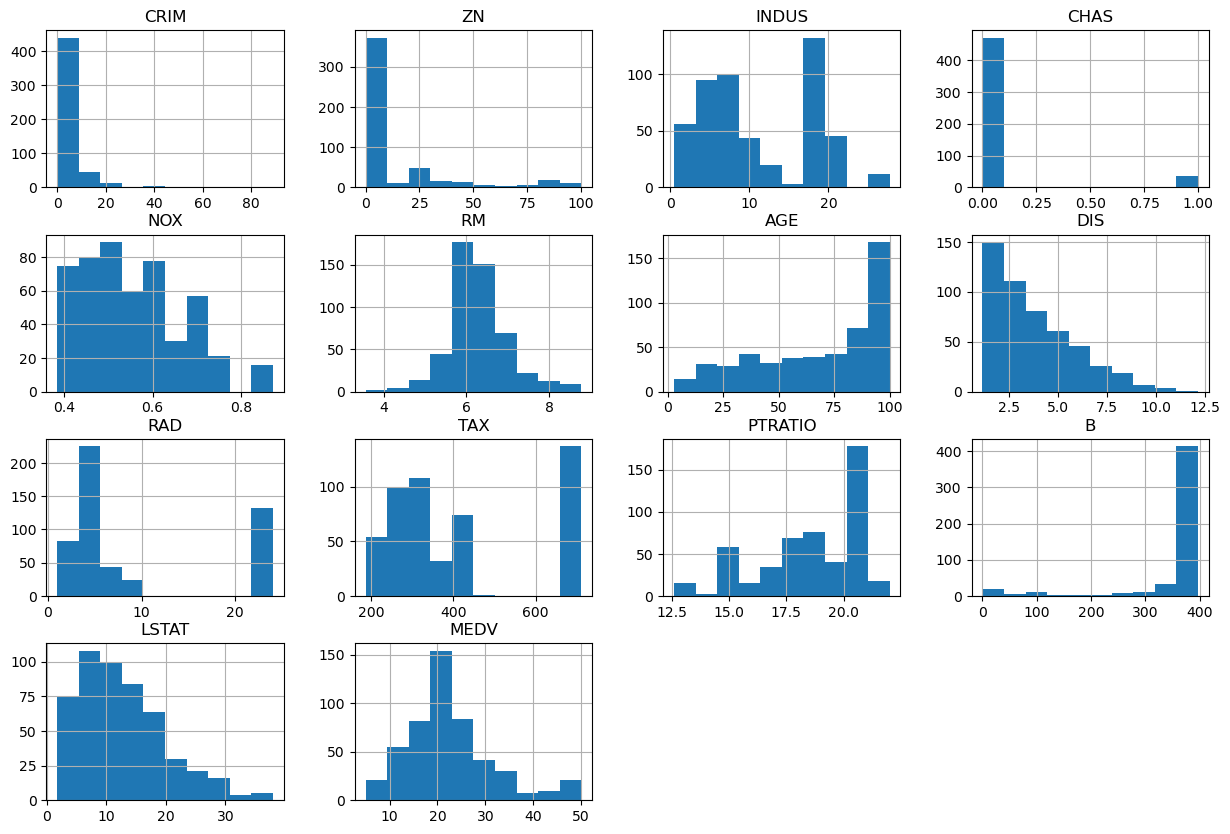

In [21]:
df.hist(figsize = (15, 10));

In [22]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [23]:
Normalize = preprocessing.PowerTransformer(method='box-cox', standardize = False)
cols = ['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']
mat = Normalize.fit_transform(df[cols])
# box-cox tranform ได้แค่ข้อมูลที่มีค่ามากกว่า 0
bc_cols = [f'bc{c}' for c in cols]
ds = pd.concat([df, pd.DataFrame(mat, columns = bc_cols)], axis = 'columns')

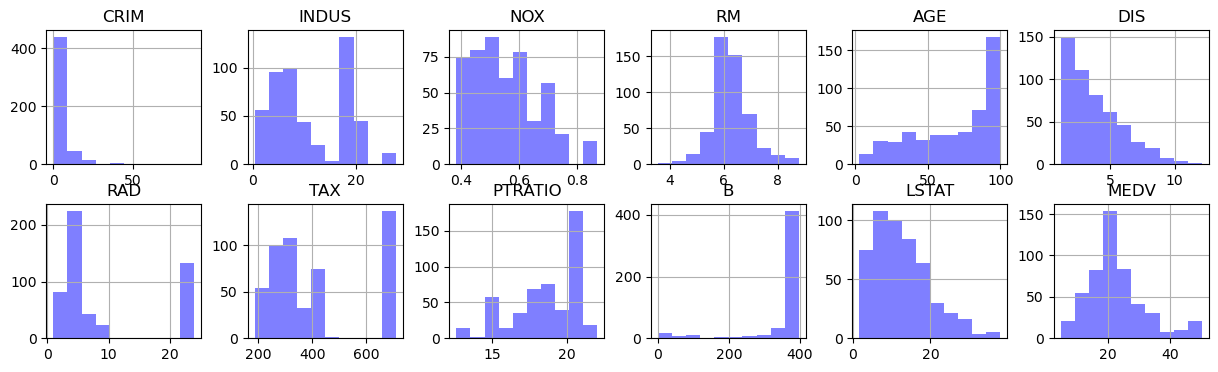

In [24]:
ds[cols].hist(layout = (2,6), figsize = (15,4), color = 'blue', alpha = .5);

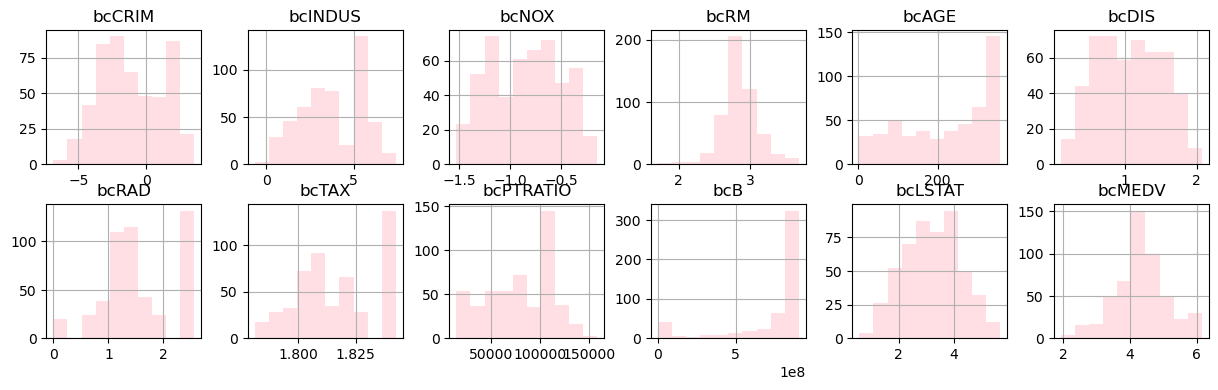

In [25]:
ds[bc_cols].hist(layout = (2,6), figsize = (15,4), color = 'pink', alpha = .5);

In [26]:
Normalize = preprocessing.PowerTransformer(method='yeo-johnson', standardize = False)
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']
mat = Normalize.fit_transform(df[cols])
# Yeo-Johnson ได้ทั้งบวกลบศูนย์
yj_cols = [f'yj{c}' for c in cols]
ds = pd.concat([df, pd.DataFrame(mat, columns = yj_cols)], axis = 'columns')

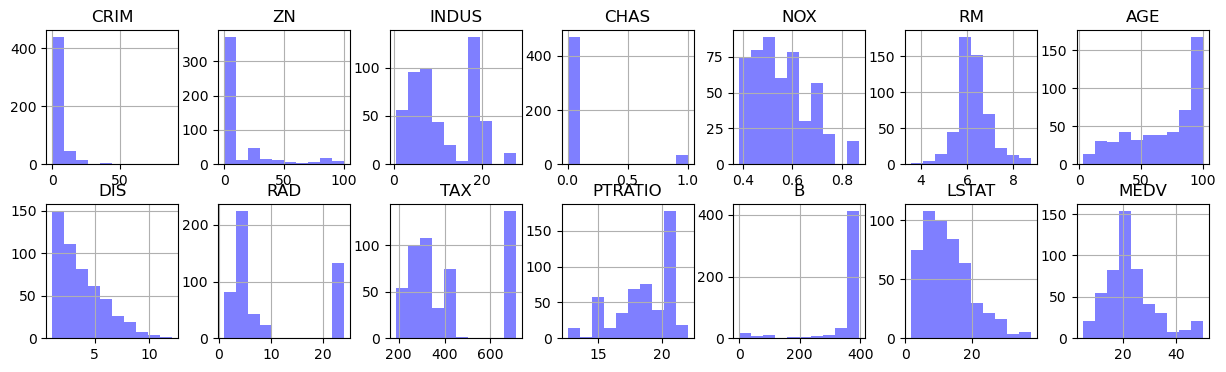

In [27]:
ds[cols].hist(layout = (2,7), figsize = (15,4), color = 'blue', alpha = .5);

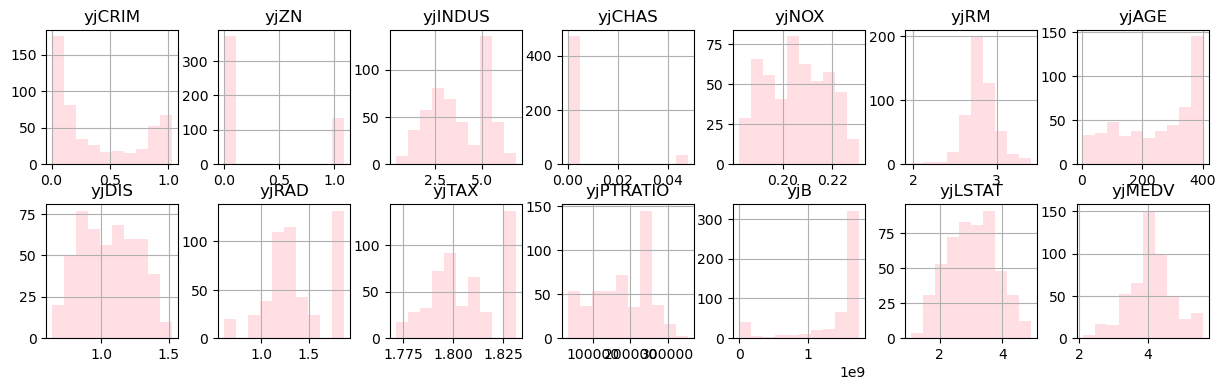

In [28]:
ds[yj_cols].hist(layout = (2,7), figsize = (15,4), color = 'pink', alpha = .5);